<h3>Problem Statement:</h3> You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

<h4>FEATURES:</h4>

**Name:** The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

**Year:** The year or edition of the model.

**Kilometers_Driven:** The total kilometres driven in the car by the previous owner(s) in KM.

**Fuel_Type:** The type of fuel used by the car.

**Transmission:** The type of transmission used by the car.

**Owner_Type:** Whether the ownership is Firsthand, Second hand or other.

**Mileage:** The standard mileage offered by the car company in kmpl or km/kg

**Engine:** The displacement volume of the engine in cc.

**Power:** The maximum power of the engine in bhp.

**Seats:** The number of seats in the car.

**Price:** The price of the used car in INR Lakhs.

<h5>1. Importing all essential libraries.</h5>

In [89]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing


<h5>2. Importing datasets.</h5>

In [90]:
train_data=pd.read_excel("train_data.xlsx")
test_data=pd.read_excel("test_data.xlsx")

In [91]:
train_data.tail(20)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5999,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57 kmpl,1193 CC,88.7 bhp,5.0,4.00
6000,Hyundai i20 Sportz 1.2,Bangalore,2014,68010,Petrol,Manual,Second,18.5 kmpl,1197 CC,82.85 bhp,5.0,5.25
6001,Audi A6 2011-2015 2.0 TDI,Kochi,2013,91903,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,17.56
6002,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09 kmpl,1598 CC,103.5 bhp,5.0,3.25
6003,Maruti Celerio VXI,Bangalore,2015,67600,Petrol,Manual,First,23.1 kmpl,998 CC,67.04 bhp,5.0,4.00
6004,Hyundai Getz GLE,Coimbatore,2007,66800,Petrol,Manual,First,15.3 kmpl,1341 CC,83 bhp,5.0,2.20
6005,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,7.43
6006,Mercedes-Benz M-Class ML 320 CDI,Mumbai,2009,102002,Diesel,Automatic,First,8.7 kmpl,2987 CC,224.34 bhp,5.0,10.75
6007,Maruti Swift Dzire Vdi BSIV,Delhi,2011,68000,Diesel,Manual,First,19.3 kmpl,1248 CC,73.9 bhp,5.0,2.75
6008,Porsche Panamera Diesel,Hyderabad,2013,40000,Diesel,Automatic,Second,17.85 kmpl,2967 CC,300 bhp,4.0,45.00


<h5>3. Information about dataset.</h5>

In [92]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [93]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


<h5>3. Information about dataset.</h5>

In [94]:
train_data.shape

(6019, 12)

In [95]:
train_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

<h5>4. Removing NULL records.</h5>

In [96]:
#dropping NULL rows.
train_data.dropna(inplace=True)
train_data.isnull().sum()


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<h5>5. Analysing the Data.</h5>

In [97]:
train_data['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [98]:
train_data['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998])

In [99]:
train_data['Kilometers_Driven'].unique()

array([72000, 41000, 46000, ..., 45004, 70602, 27365])

In [100]:
train_data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [101]:
train_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [102]:
train_data['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [103]:
train_data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.,  0.])

In [104]:
train_data['Kilometers_Driven'].value_counts().sort_index(ascending=True)

Kilometers_Driven
171        1
600        1
1000       9
1001       2
1011       1
          ..
480000     2
620000     1
720000     1
775000     1
6500000    1
Name: count, Length: 3080, dtype: int64

In [105]:
train_data['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [106]:
train_data['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', '1896 CC',
       '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC', '1405 CC',
       '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC', '2400 CC',
       '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC', '1395 CC',
       '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368 CC',

In [107]:
train_data['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

</h5>Modification :</h5><br><br>

1. Units of Engine , Mileage , Power have to be removed.

2. Attributes such as Engine , Mileage , Power need to be modify to int or float to get best accuracy and work with rest attributes. 

3. Some numerical attrubtes have 0 values such as seat , mileage for that need to convert them to Nan and then drop such rows. 



** Removing units and converting `Engine` , `Mileage` , `Power` attributes from string to integer.


In [108]:
train_data['Mileage'] = train_data['Mileage'].str.rstrip('kmpl')
train_data['Mileage'] = train_data['Mileage'].str.rstrip('km/kg')

train_data['Engine'] = train_data['Engine'].str.rstrip('CC')
train_data['Power'] = train_data['Power'].str.rstrip('bhp')

train_data["Mileage"]=train_data["Mileage"].astype(float)
train_data["Engine"]=train_data["Engine"].astype(float)

train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74


** An error encounter while converting `Power` attribute to int because there is 'null' string is present.

firstly , convert '`null`' to '`Nan`' then drop those rows.

In [109]:
train_data['Power'].value_counts().sort_index(ascending=True)

Power
100        54
100.6      39
101         4
102        57
102.5       8
         ... 
98.82       2
98.96       9
99         17
99.6        5
null      103
Name: count, Length: 371, dtype: int64

Total 103 null string values found

In [110]:
train_data['Power'] = train_data['Power'].replace(regex="null", value = np.nan)


#dropping null values from Power
train_data.dropna(inplace=True)

# coverting to float
train_data["Power"]=train_data["Power"].astype(float)

In [111]:
train_data["Mileage"].value_counts().sort_index(ascending=False)

Mileage
33.54     5
33.44     4
32.26     2
31.79     2
30.46     1
         ..
7.94      2
7.81      1
7.50      1
6.40      1
0.00     28
Name: count, Length: 429, dtype: int64

Total `28` records has 0.00 mileage 

In [112]:
train_data['Mileage'] = train_data['Mileage'].replace(0.00, value = np.nan)

#dropping null values from Power
train_data.dropna(inplace=True)
train_data["Mileage"].value_counts().sort_index(ascending=False)

Mileage
33.54    5
33.44    4
32.26    2
31.79    2
30.46    1
        ..
8.00     1
7.94     2
7.81     1
7.50     1
6.40     1
Name: count, Length: 428, dtype: int64

** Fetching car `brand` and from `Name` 

In [113]:
#splitting Name into Brands and Models

car_brand=[]

for index,rows in train_data.iterrows():
  car_brand.append(rows['Name'].split()[0])
 

train_data['Brand']=car_brand # Brands column

train_data.drop(["Name"],axis=1,inplace=True)

train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [114]:
train_data["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

One duplicate name `Isuzu` and `Isuzu` found and some incomplete info. 

In [115]:
train_data['Brand'] = train_data['Brand'].replace('ISUZU', value = 'Isuzu')
train_data['Brand'] = train_data['Brand'].replace('Land', value = 'Land-Rover')
train_data["Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land-Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

Analysing attributes with `price`


count    5844.000000
mean        9.545515
std        11.187139
min         0.440000
25%         3.517500
50%         5.705000
75%        10.000000
max       160.000000
Name: Price, dtype: float64


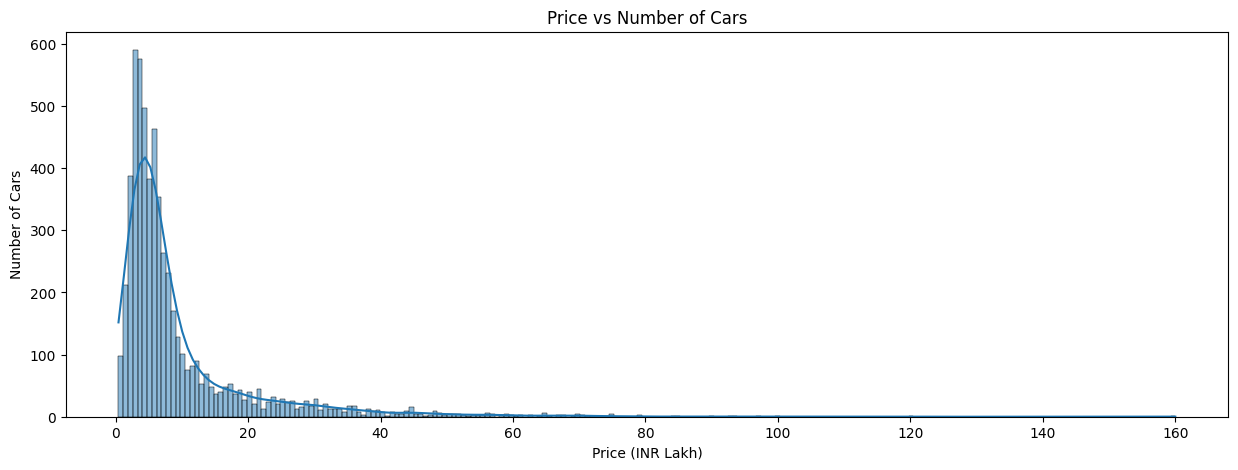

In [116]:
print(train_data['Price'].describe())


plt.figure(figsize=(15, 5))
graph=sns.histplot(data=train_data['Price'],kde=True)
graph.set(xlabel="Price (INR Lakh)",ylabel="Number of Cars",title="Price vs Number of Cars")
plt.show()

Maximum number of cars are within 15 Lakh

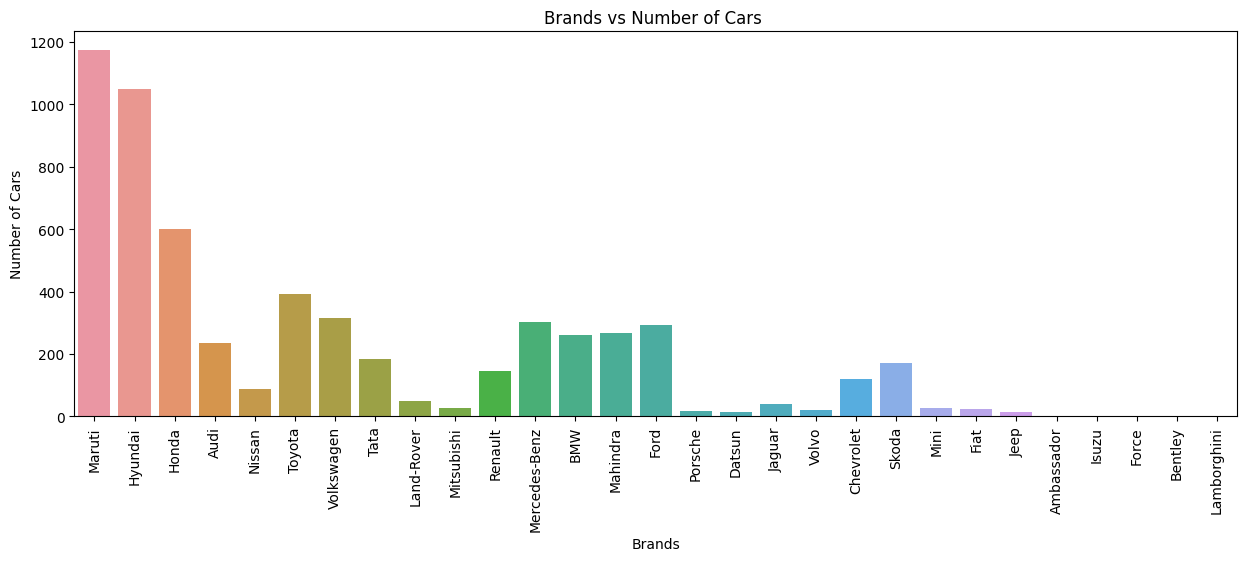

In [117]:


plt.figure(figsize=(15, 5))
graph=sns.countplot(x="Brand",data=train_data)
plt.xticks(rotation=90)
graph.set(xlabel="Brands",ylabel="Number of Cars",title="Brands vs Number of Cars ")
plt.show()



Brands `Maruti` and `Hyundai` are in majority

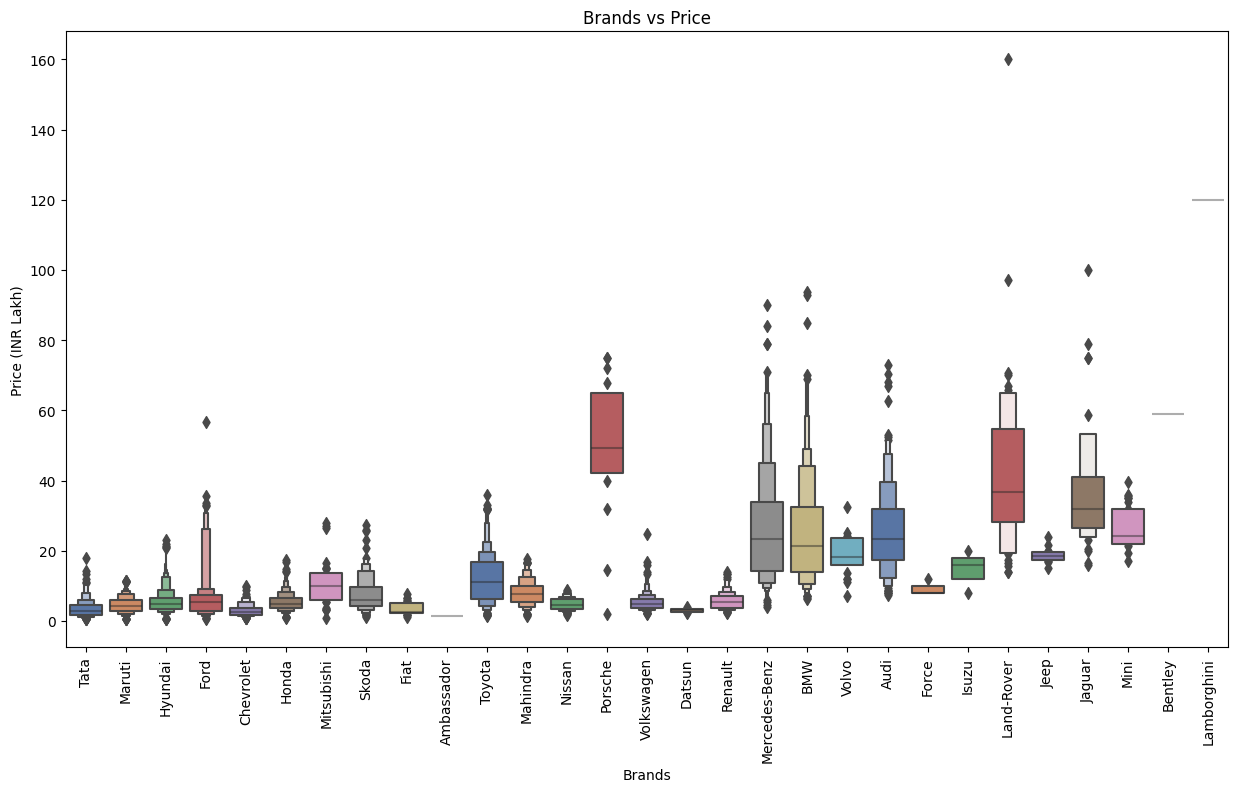

In [118]:
# price vs brands
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
graph=sns.boxenplot(data=train_data.sort_values("Price"), x="Brand", y="Price",palette="deep")
graph.set(xlabel="Brands",ylabel="Price (INR Lakh)",title="Brands vs Price")
plt.show()

Cars from the manufactures of `Lamborghini` , `Bentley` , `Porsche` , `Land Rover` , `Jaguar` are the most expensive from the rest competitors.

On the other hand, cars from `Tata` , `Maruti` , `Hyundai` , `Honda` are affordable cars

In [119]:
no_of_cars = train_data["Location"].value_counts().reset_index()
no_of_cars

,Location,count
0,Mumbai,773
1,Hyderabad,713
2,Kochi,643
3,Coimbatore,626
4,Pune,590
5,Delhi,543
6,Kolkata,519
7,Chennai,475
8,Jaipur,401
9,Bangalore,343


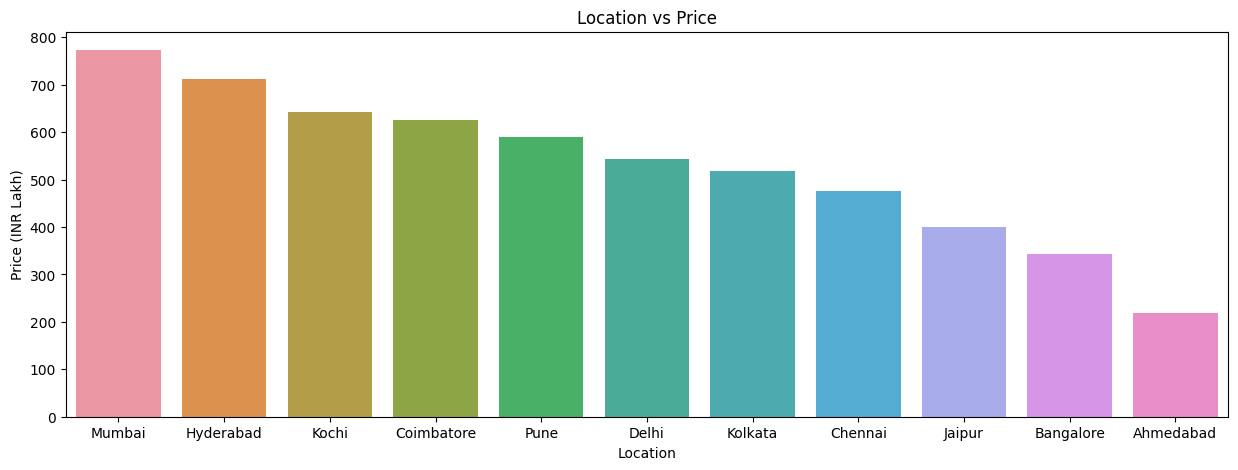

In [120]:
# price vs location
plt.figure(figsize=(15, 5))
graph=sns.barplot(data=no_of_cars, x="Location", y="count")
graph.set(xlabel="Location",ylabel="Price (INR Lakh)",title="Location vs Price")
plt.show()

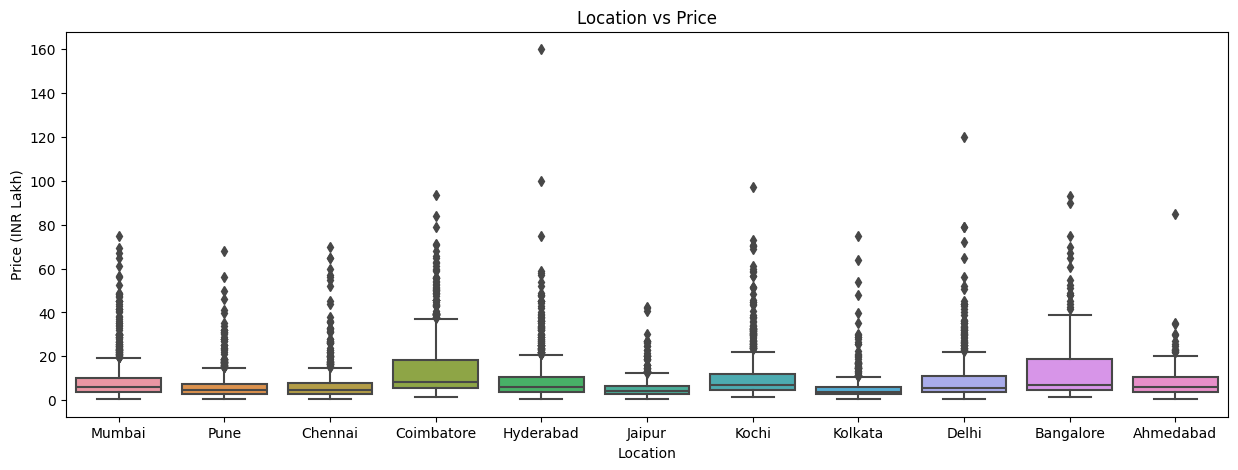

In [121]:
# price vs location
plt.figure(figsize=(15, 5))
graph=sns.boxplot(data=train_data, x="Location", y="Price")
graph.set(xlabel="Location",ylabel="Price (INR Lakh)",title="Location vs Price")
plt.show()

`Coimbatore` , `Delhi`, `Bangalore` , `Hyderabad` , `Kochi` are most favourable locations for expensive used cars whereas, in `Jaipur` cars are cheaper

Moreover, `Availability` of cars also decides overall `costing` , `more` cars in an area prices are `high`  

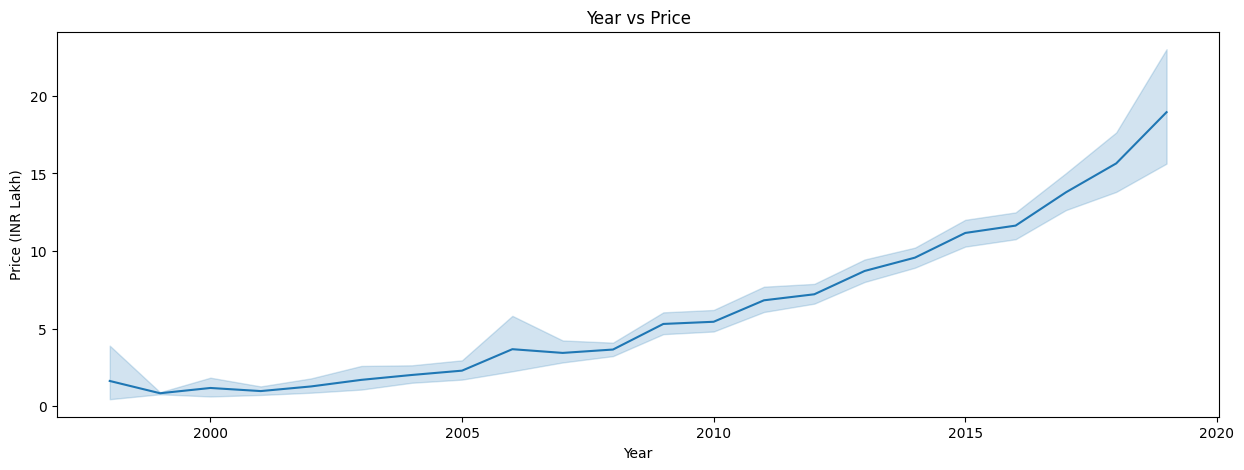

In [122]:
# price vs year
plt.figure(figsize=(15, 5))
graph=sns.lineplot(data=train_data, x="Year", y="Price")
graph.set(xlabel="Year",ylabel="Price (INR Lakh)",title="Year vs Price")
plt.show()

Prices gradually increased over the years.

In [123]:
train_data["Kilometers_Driven"].describe()

count    5.844000e+03
mean     5.832696e+04
std      9.235508e+04
min      1.710000e+02
25%      3.349325e+04
50%      5.256450e+04
75%      7.241450e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

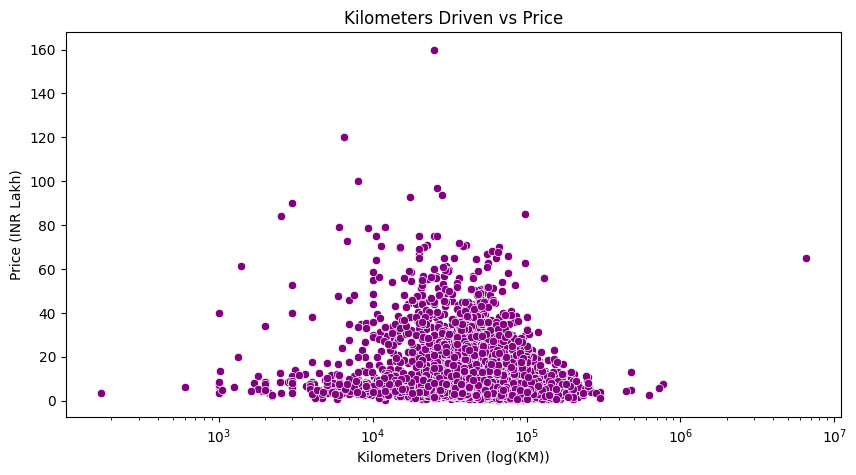

In [124]:
plt.subplots(figsize=(10, 5))
graph=sns.scatterplot(x="Kilometers_Driven",y="Price",data=train_data,color='purple')
graph.set(xlabel="Kilometers Driven (log(KM))",ylabel="Price (INR Lakh)",title="Kilometers Driven vs Price")
plt.xscale('log')
plt.show()

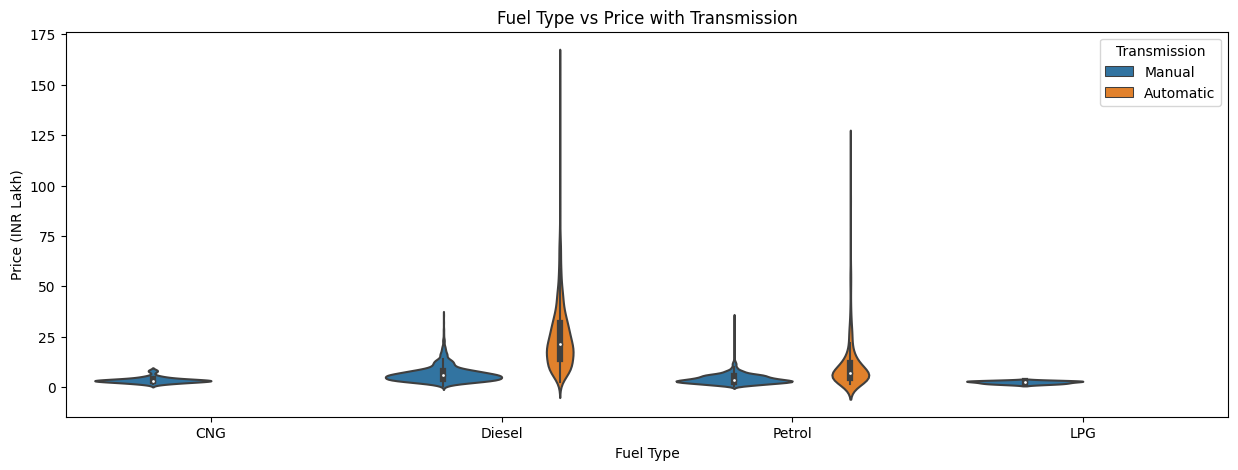

In [125]:
#price vs fuel type

plt.figure(figsize=(15, 5))
graph=sns.violinplot(data=train_data,x="Fuel_Type", y="Price", hue="Transmission")
graph.set(xlabel="Fuel Type",ylabel="Price (INR Lakh)",title="Fuel Type vs Price with Transmission")
plt.show()

`Automatic` Transmission cars are more expensive in contrast to `Manual` transmission.

Additionally , `Diesel` cars prices with `Automatic` transmission are overated in comparison with `Petrol` cars however, `CNG` and `LPG` cars are inexpensive.

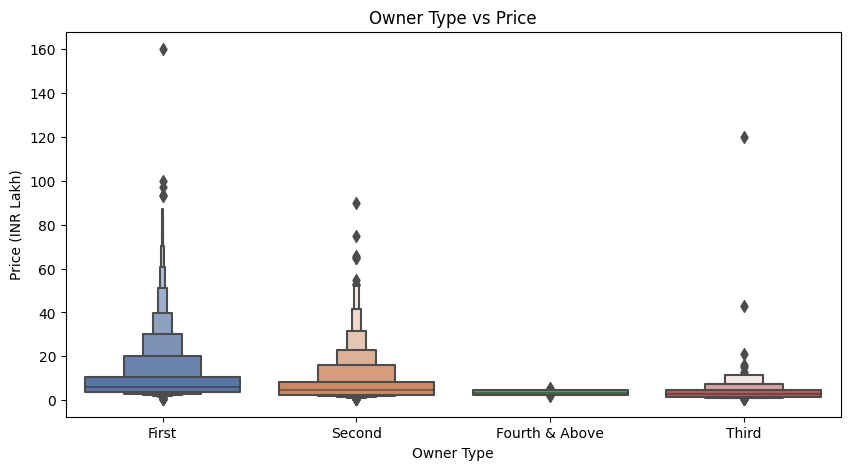

In [126]:
plt.figure(figsize=(10, 5))
graph=sns.boxenplot(data=train_data, x="Owner_Type", y="Price",palette="deep")
graph.set(xlabel="Owner Type",ylabel="Price (INR Lakh)",title="Owner Type vs Price")
plt.show()

Cost of `First` and `Second` ownership cars are usually High whereas pricing of `Fourth` ownership cars are affordable. 

In [127]:
train_data['Engine'].describe()

count    5844.000000
mean     1622.834531
std       598.989657
min       624.000000
25%      1198.000000
50%      1495.000000
75%      1984.000000
max      5998.000000
Name: Engine, dtype: float64

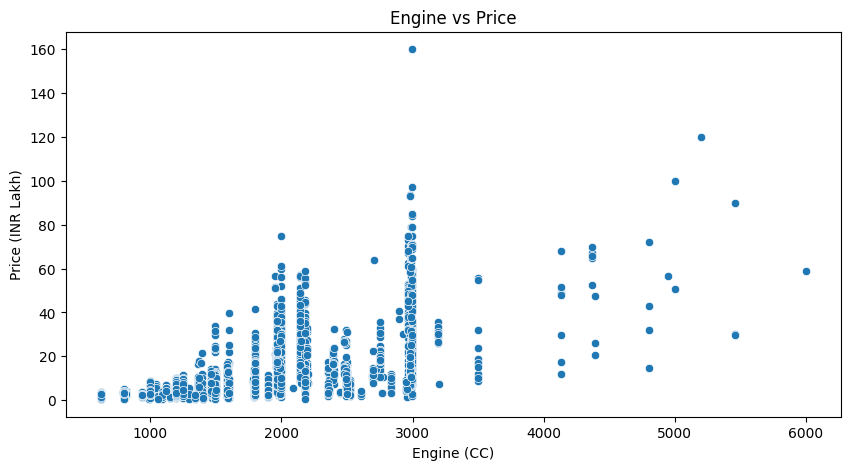

In [128]:
#price vs engine

plt.subplots(figsize=(10, 5))
graph=sns.scatterplot(x="Engine",y="Price",data=train_data)
graph.set(xlabel="Engine (CC)",ylabel="Price (INR Lakh)",title="Engine vs Price")
plt.show()


`Prices` of used cars increases with increasing `Engine` capacity.

In [129]:
print(train_data["Mileage"].describe())

count    5844.000000
mean       18.365412
std         4.188280
min         6.400000
25%        15.300000
50%        18.330000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64


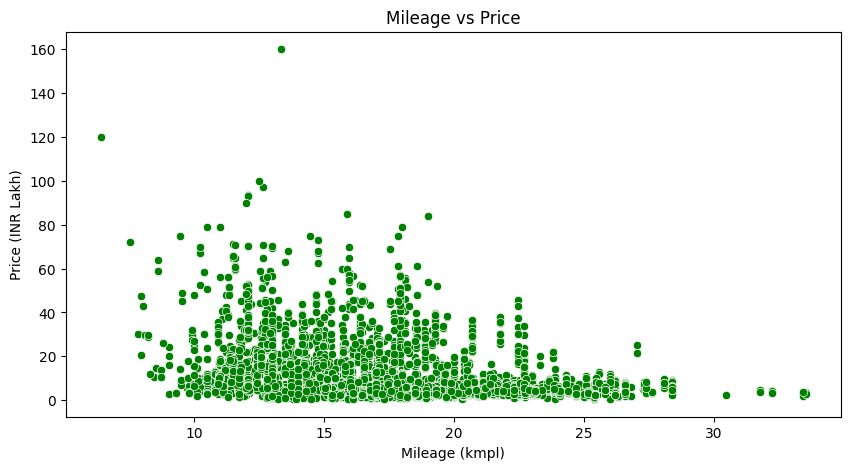

In [130]:
plt.subplots(figsize=(10, 5))
graph=sns.scatterplot(x="Mileage",y="Price",data=train_data,color='green')
graph.set(xlabel="Mileage (kmpl)",ylabel="Price (INR Lakh)",title="Mileage vs Price")
plt.show()


Some Cars having `Mileage` within 20 kmpl are costly. Prices `increases` for `lower` Mileage cars. 

In [131]:
print(train_data["Power"].describe())

count    5844.000000
mean      113.139612
std        53.812210
min        34.200000
25%        75.000000
50%        94.680000
75%       138.100000
max       560.000000
Name: Power, dtype: float64


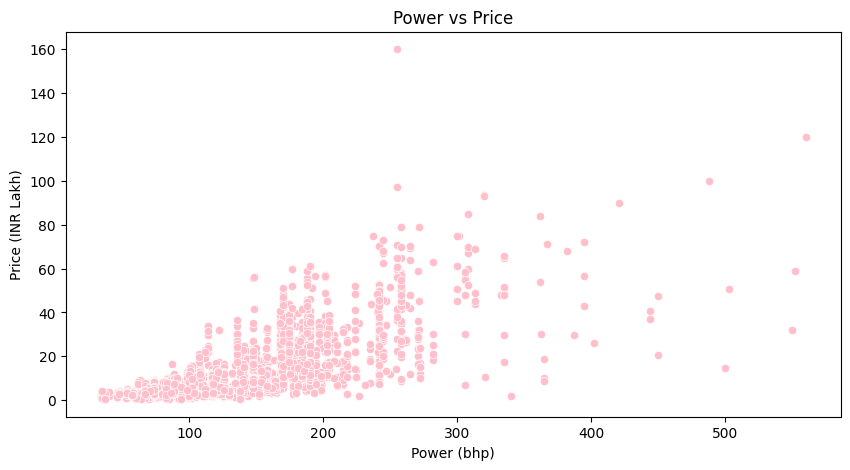

In [132]:
plt.subplots(figsize=(10, 5))
graph=sns.scatterplot(x="Power",y="Price",data=train_data,color='pink')
graph.set(xlabel="Power (bhp)",ylabel="Price (INR Lakh)",title="Power vs Price")
plt.show()

`Prices` increases with increasing `Power` output.

In [133]:
print(train_data["Seats"].describe())

count    5844.000000
mean        5.285079
std         0.806768
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64


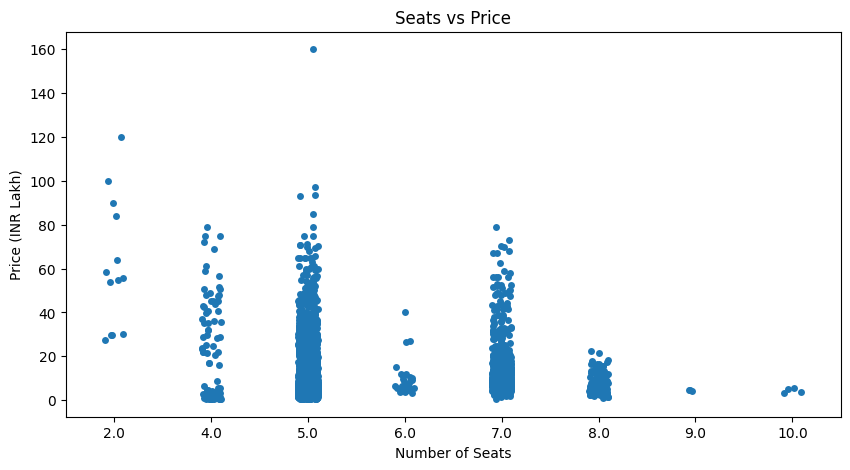

In [134]:
plt.subplots(figsize=(10, 5))
graph=sns.stripplot(x="Seats",y="Price",data=train_data)
graph.set(xlabel="Number of Seats",ylabel="Price (INR Lakh)",title="Seats vs Price")
plt.show()

`2 and 5 seater` cars are most expensive and `4 and 7 seater` cars have sufficient cost while `prices` descrease with increasing number of seats.

<h5>Conclusion :</h5><br>
______________________________________________________________________

1. Each `Brands` plays an important role in overall cost of cars. ie : Premium `brand` result effective high `price`.
2. Individual `Location` comprises availability of cars 
3. Over the `year` prices increases
4. Total `KMs` car is driven is effective while getting best pricing as less `driven` high `price` .  
5. `Fuel type` is major factor while deciding costing such as `diesel` and `petrol` cars are more expensive than `LPG` and `CNG`.
6. `Transmission` determines convenience while driving a car and such factor also deals with `costing`.
7. `Ownership` determines usage of car less used cars has an effective price.
8. Fewer seater cars usually have high price.
9. Specification such as `Engine` , `Mileage` , `Power` are totally depends on brands as such result their actual price. 

<h3> Removing Non-Usable Columns</h3> 

In [135]:
train_data.drop(["Mileage","Engine","Power"],axis=1,inplace=True)
train_data = train_data.reset_index(drop=True)
train_data

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...
5839,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,Maruti
5840,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,Hyundai
5841,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,Mahindra
5842,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,Maruti


In [136]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5844 non-null   object 
 1   Year               5844 non-null   int64  
 2   Kilometers_Driven  5844 non-null   int64  
 3   Fuel_Type          5844 non-null   object 
 4   Transmission       5844 non-null   object 
 5   Owner_Type         5844 non-null   object 
 6   Seats              5844 non-null   float64
 7   Price              5844 non-null   float64
 8   Brand              5844 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 411.0+ KB


<h5>Removing Outlier</h5>

Attribute with integer value `Kilometers_Driven` has some outlier values.

In [137]:
train_data["Kilometers_Driven"].sort_values(ascending=False)

2258    6500000
325      775000
1802     720000
343      620000
2733     480000
         ...   
2560       1000
5770       1000
166        1000
5443        600
1313        171
Name: Kilometers_Driven, Length: 5844, dtype: int64

In [138]:
# using IQR

Q1 = train_data["Kilometers_Driven"].quantile(0.25)
Q3 = train_data["Kilometers_Driven"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = (1.5 * IQR) - Q1
upper_bound = Q3 + 1.5 * IQR

for i in range(len(train_data["Kilometers_Driven"])):

    if train_data.loc[i,"Kilometers_Driven"] < lower_bound:
        train_data.loc[i,"Kilometers_Driven"]=lower_bound

    elif train_data.loc[i,"Kilometers_Driven"] > upper_bound :    
        train_data.loc[i,"Kilometers_Driven"]=upper_bound



In [139]:
train_data["Kilometers_Driven"].describe()

count      5844.000000
mean      57086.603953
std       28002.533815
min       24888.625000
25%       33493.250000
50%       52564.500000
75%       72414.500000
max      130796.375000
Name: Kilometers_Driven, dtype: float64

<h2>Working with data labels</h2>

In [140]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5844 non-null   object 
 1   Year               5844 non-null   int64  
 2   Kilometers_Driven  5844 non-null   float64
 3   Fuel_Type          5844 non-null   object 
 4   Transmission       5844 non-null   object 
 5   Owner_Type         5844 non-null   object 
 6   Seats              5844 non-null   float64
 7   Price              5844 non-null   float64
 8   Brand              5844 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 411.0+ KB


<h3>Applying Encoding Categorical values</h3><br>
1. Onehot encoding : applicable to data values which have no logical ordering.<br>
2. Label encoding : applicable to data values which have logical ordering. 

Applying `Onehot Encoding` on `Location`

In [141]:
train_data["Location"].value_counts()

Location
Mumbai        773
Hyderabad     713
Kochi         643
Coimbatore    626
Pune          590
Delhi         543
Kolkata       519
Chennai       475
Jaipur        401
Bangalore     343
Ahmedabad     218
Name: count, dtype: int64

In [142]:
encoded_location=train_data["Location"]
encoded_location=pd.get_dummies(encoded_location,drop_first=True)
encoded_location.head()

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False


In [143]:
train_data=pd.concat([train_data,encoded_location],axis=1)
train_data = train_data.drop(['Location'], axis=1)
train_data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,2010,72000.0,CNG,Manual,First,5.0,1.75,Maruti,False,False,False,False,False,False,False,False,True,False
1,2015,41000.0,Diesel,Manual,First,5.0,12.50,Hyundai,False,False,False,False,False,False,False,False,False,True
2,2011,46000.0,Petrol,Manual,First,5.0,4.50,Honda,False,True,False,False,False,False,False,False,False,False
3,2012,87000.0,Diesel,Manual,First,7.0,6.00,Maruti,False,True,False,False,False,False,False,False,False,False
4,2013,40670.0,Diesel,Automatic,Second,5.0,17.74,Audi,False,False,True,False,False,False,False,False,False,False


Applying `Onehot Encoding` on `Fuel Type`

In [144]:
train_data["Fuel_Type"].value_counts()

Fuel_Type
Diesel    3134
Petrol    2645
CNG         55
LPG         10
Name: count, dtype: int64

In [145]:
encoded_fuel_type=train_data["Fuel_Type"]
encoded_fuel_type=pd.get_dummies(encoded_fuel_type,drop_first=True)
encoded_fuel_type.head()

,Diesel,LPG,Petrol
0,False,False,False
1,True,False,False
2,False,False,True
3,True,False,False
4,True,False,False


In [146]:
train_data=pd.concat([train_data,encoded_fuel_type],axis=1)
train_data = train_data.drop(['Fuel_Type'], axis=1)
train_data.head()

,Year,Kilometers_Driven,Transmission,Owner_Type,Seats,Price,Brand,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol
0,2010,72000.0,Manual,First,5.0,1.75,Maruti,False,False,False,False,False,False,False,False,True,False,False,False,False
1,2015,41000.0,Manual,First,5.0,12.50,Hyundai,False,False,False,False,False,False,False,False,False,True,True,False,False
2,2011,46000.0,Manual,First,5.0,4.50,Honda,False,True,False,False,False,False,False,False,False,False,False,False,True
3,2012,87000.0,Manual,First,7.0,6.00,Maruti,False,True,False,False,False,False,False,False,False,False,True,False,False
4,2013,40670.0,Automatic,Second,5.0,17.74,Audi,False,False,True,False,False,False,False,False,False,False,True,False,False


Applying `Onehot Encoding` on `Transmission`

In [147]:
train_data["Transmission"].value_counts()

Transmission
Manual       4163
Automatic    1681
Name: count, dtype: int64

In [148]:
encoded_transmission=train_data["Transmission"]
encoded_transmission=pd.get_dummies(encoded_transmission,drop_first=True)
encoded_transmission.head()

,Manual
0,True
1,True
2,True
3,True
4,False


In [149]:
train_data=pd.concat([train_data,encoded_transmission],axis=1)
train_data = train_data.drop(['Transmission'], axis=1)
train_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Brand,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol,Manual
0,2010,72000.0,First,5.0,1.75,Maruti,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,2015,41000.0,First,5.0,12.50,Hyundai,False,False,False,False,False,False,False,False,False,True,True,False,False,True
2,2011,46000.0,First,5.0,4.50,Honda,False,True,False,False,False,False,False,False,False,False,False,False,True,True
3,2012,87000.0,First,7.0,6.00,Maruti,False,True,False,False,False,False,False,False,False,False,True,False,False,True
4,2013,40670.0,Second,5.0,17.74,Audi,False,False,True,False,False,False,False,False,False,False,True,False,False,False


Applying `Label Encoding` on `Owner Type`

In [150]:
label_encoder = preprocessing.LabelEncoder()

In [151]:
train_data["Owner_Type"].value_counts()

Owner_Type
First             4818
Second             918
Third              101
Fourth & Above       7
Name: count, dtype: int64

In [152]:
train_data['Owner_Type']=label_encoder.fit_transform(train_data['Owner_Type'])
train_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Brand,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol,Manual
0,2010,72000.0,0,5.0,1.75,Maruti,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,2015,41000.0,0,5.0,12.50,Hyundai,False,False,False,False,False,False,False,False,False,True,True,False,False,True
2,2011,46000.0,0,5.0,4.50,Honda,False,True,False,False,False,False,False,False,False,False,False,False,True,True
3,2012,87000.0,0,7.0,6.00,Maruti,False,True,False,False,False,False,False,False,False,False,True,False,False,True
4,2013,40670.0,2,5.0,17.74,Audi,False,False,True,False,False,False,False,False,False,False,True,False,False,False


Applying `Onehot Encoding` on `Brands`

In [153]:
train_data["Brand"].value_counts()


Brand
Maruti           1175
Hyundai          1051
Honda             600
Toyota            394
Volkswagen        314
Mercedes-Benz     304
Ford              294
Mahindra          268
BMW               262
Audi              234
Tata              183
Skoda             170
Renault           145
Chevrolet         120
Nissan             89
Land-Rover         51
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Isuzu               3
Force               3
Ambassador          1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

In [154]:
encoded_brand=train_data["Brand"]
encoded_brand=pd.get_dummies(encoded_brand,drop_first=True)
encoded_brand.head()

,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,...,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [155]:
train_data=pd.concat([train_data,encoded_brand],axis=1)
train_data = train_data.drop(['Brand'], axis=1)
train_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,...,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2010,72000.0,0,5.0,1.75,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015,41000.0,0,5.0,12.50,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2011,46000.0,0,5.0,4.50,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2012,87000.0,0,7.0,6.00,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2013,40670.0,2,5.0,17.74,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [156]:
train_data.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Diesel', 'LPG', 'Petrol',
       'Manual', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat',
       'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Lamborghini', 'Land-Rover', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mini', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

<h3>Working with Test Data</h3>


In [157]:
test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [158]:

#dropping Nan values
test_data.dropna(inplace=True)

# removing units and converting to float.
test_data['Mileage'] = test_data['Mileage'].str.rstrip('kmpl')
test_data['Mileage'] = test_data['Mileage'].str.rstrip('km/kg')

test_data['Engine'] = test_data['Engine'].str.rstrip('CC')
test_data['Power'] = test_data['Power'].str.rstrip('bhp')

test_data["Mileage"]=test_data["Mileage"].astype(float)
test_data["Engine"]=test_data["Engine"].astype(float)

test_data['Power'] = test_data['Power'].replace(regex="null", value = np.nan)

test_data.dropna(inplace=True)

test_data["Power"]=test_data["Power"].astype(float)

test_data['Mileage'] = test_data['Mileage'].replace(0.00, value = np.nan)

test_data.dropna(inplace=True)

# seperating brand name from car name
car_brand=[]

for index,rows in test_data.iterrows():
  car_brand.append(rows['Name'].split()[0])
 

test_data['Brand']=car_brand # Brands column


test_data.drop(["Name","Mileage","Engine","Power"],axis=1,inplace=True)
test_data = test_data.reset_index(drop=True)

test_data['Brand'] = test_data['Brand'].replace('ISUZU', value = 'Isuzu')
test_data['Brand'] = test_data['Brand'].replace('Land', value = 'Land-Rover')

# removing outlier from Kilometers_Driven
# using IQR

Q1 = test_data["Kilometers_Driven"].quantile(0.25)
Q3 = test_data["Kilometers_Driven"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = (1.5 * IQR) - Q1
upper_bound = Q3 + 1.5 * IQR

for i in range(len(test_data["Kilometers_Driven"])):

    if test_data.loc[i,"Kilometers_Driven"] < lower_bound:
        test_data.loc[i,"Kilometers_Driven"]=lower_bound

    elif test_data.loc[i,"Kilometers_Driven"] > upper_bound :    
        test_data.loc[i,"Kilometers_Driven"]=upper_bound


# encoding location
encoded_location=test_data["Location"]
encoded_location=pd.get_dummies(encoded_location,drop_first=True)
test_data=pd.concat([test_data,encoded_location],axis=1)
test_data = test_data.drop(['Location'], axis=1)

# encoding Fuel Type
encoded_fuel_type=test_data["Fuel_Type"]
encoded_fuel_type=pd.get_dummies(encoded_fuel_type,drop_first=True)
test_data=pd.concat([test_data,encoded_fuel_type],axis=1)
test_data = test_data.drop(['Fuel_Type'], axis=1)

# encoding Transmission
encoded_transmission=test_data["Transmission"]
encoded_transmission=pd.get_dummies(encoded_transmission,drop_first=True)
test_data=pd.concat([test_data,encoded_transmission],axis=1)
test_data = test_data.drop(['Transmission'], axis=1)

#encoding Owner Type
test_label_encoder = preprocessing.LabelEncoder()
test_data['Owner_Type']=test_label_encoder.fit_transform(test_data['Owner_Type'])

# encoding brand
encoded_brand=test_data["Brand"]
encoded_brand=pd.get_dummies(encoded_brand,drop_first=True)
test_data=pd.concat([test_data,encoded_brand],axis=1)
test_data = test_data.drop(['Brand'], axis=1)


In [159]:
test_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,...,Mitsubishi,Nissan,OpelCorsa,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014,40929.0,0,4.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2013,54493.0,2,5.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2017,34000.0,0,7.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2014,29000.0,0,5.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2016,85609.0,2,7.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [160]:
test_data.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Bangalore',
       'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi',
       'Kolkata', 'Mumbai', 'Pune', 'Diesel', 'LPG', 'Petrol', 'Manual', 'BMW',
       'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda', 'Hyundai',
       'Isuzu', 'Jaguar', 'Jeep', 'Land-Rover', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'OpelCorsa', 'Porsche',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

In [161]:
X=train_data.loc[:,['Year','Kilometers_Driven', 'Owner_Type', 'Seats',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Diesel', 'LPG', 'Petrol',
       'Manual', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat',
       'Force', 'Ford', 'Honda', 'Hyundai','Isuzu', 'Jaguar', 'Jeep',
       'Lamborghini', 'Land-Rover', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini',
       'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo']]

X.shape

(5844, 46)

In [162]:
y = train_data.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


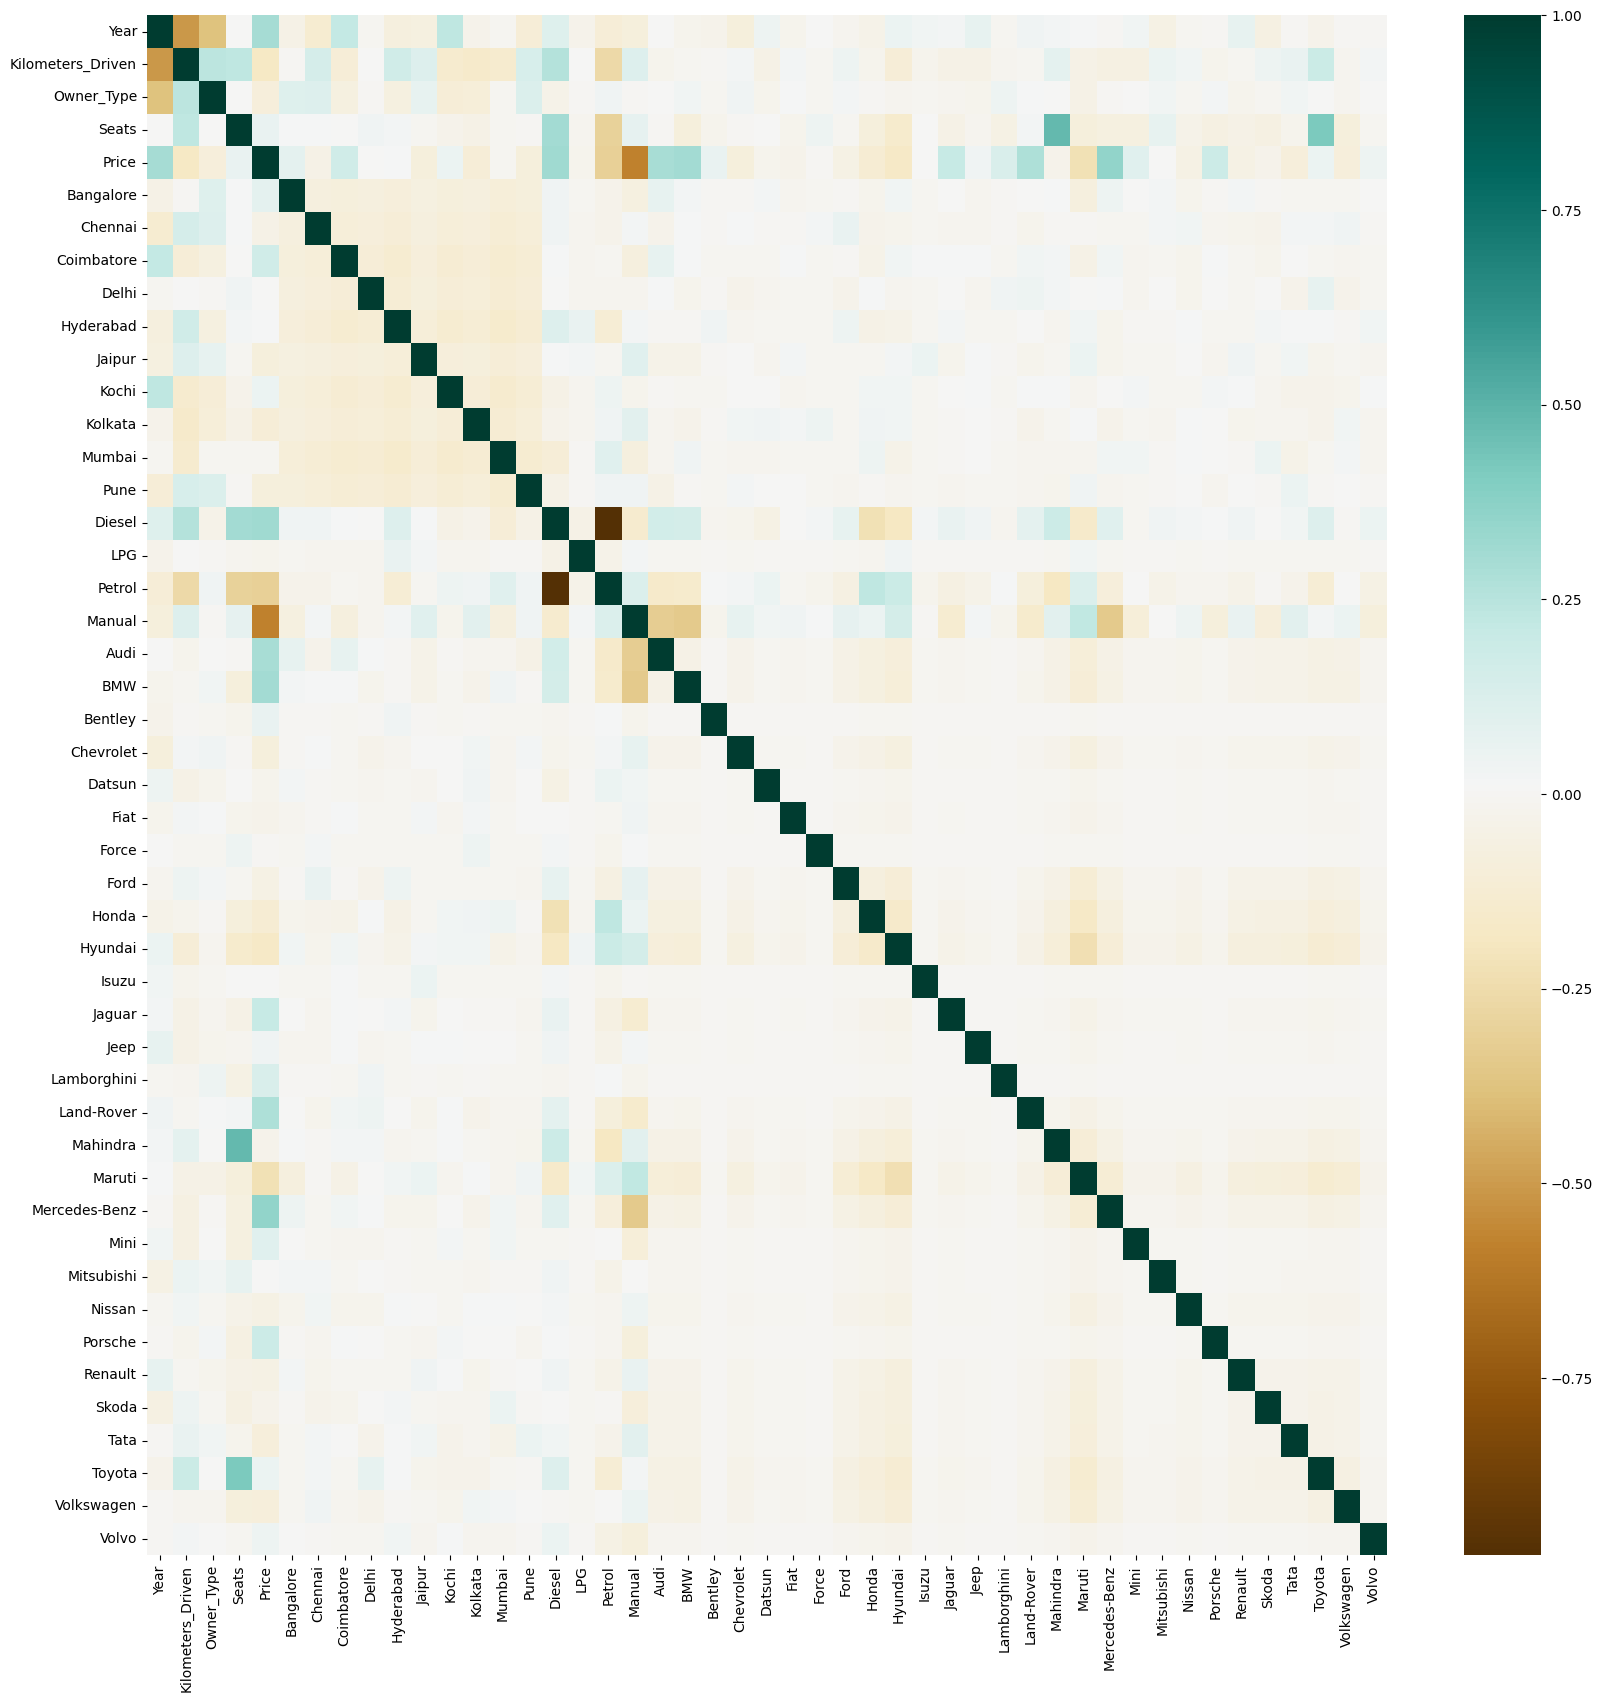

In [163]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),cmap='BrBG')

plt.show()

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [165]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred= linear_regression.predict(X_test)
print("Training score : ",linear_regression.score(X_train,y_train))
print("Testing score : ",linear_regression.score(X_test,y_test))

Training score :  0.7057697592434854
Testing score :  0.7055433165610758


In [166]:
from sklearn.ensemble import RandomForestRegressor
rf_regression = RandomForestRegressor()
rf_regression.fit(X_train, y_train)
y_pred= rf_regression.predict(X_test)
print("Traing score : ",rf_regression.score(X_train,y_train))
print("Testing score : ",rf_regression.score(X_test,y_test))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Traing score :  0.9662789051986991
Testing score :  0.8199831743799165


<h4>Testing against Input</h4>

In [168]:

temp_df=['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Mumbai', 'Pune', 'Diesel', 'LPG', 'Petrol',
       'Manual', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat',
       'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Lamborghini', 'Land-Rover', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini',
       'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo']


print("Car Price Prediction..")
year = int(input("Enter the Manufacturing Year : "))
brand = input("Enter the Brand of the car : ")
km = int(input("Enter the Kilometers Driven : "))
ownership = int(input("Enter the Ownership : "))
seats= int(input("Enter the available seats : "))
fueltype=input("Enter the Fuel Type : ")
transmissiom = input("Enter the transmission type : ")
location = input("Enter the location :")


Car Price Prediction..


In [169]:

input_data = [0] * len(temp_df)

for i in range(len(temp_df)):
    if i == 0 :
        input_data[0]=year
    elif i == 1 :
        input_data[1]=km
    elif i == 2 :
        input_data[2]=ownership
    elif i == 3 :
        input_data[3]=seats
    elif i >= 4 and i<= 13 :
        if temp_df[i] == location :
            input_data[i] = 1
    elif i >= 14 and i <= 16 :
        if temp_df[i] == fueltype :
            input_data[i] = 1            
    elif i == 15 :
        if temp_df[i] == transmissiom :
            input_data[i] = 1
    else :
        if temp_df[i] == brand :
            input_data[i] = 1


test_dict=dict(zip(temp_df,input_data))    

model_input_df=pd.DataFrame([test_dict])
effective_price= rf_regression.predict(model_input_df) 

print("Effective Price : ",round(effective_price[0],3)," INR Lakh")     

Effective Price :  6.08  INR Lakh


In [170]:
import joblib
joblib.dump(rf_regression, 'model.pkl')

['model.pkl']